# The Battle of the Neighborhoods - Week 2

### Part 1 Download and Explore New York city geographical coordinates dataset¶
Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood.

Luckily, this dataset exists for free on the web. Link to the dataset: https://geo.nyu.edu/catalog/nyu_2451_34572

First, let's download all the dependencies that we will need.

In [1]:
!pip install geopy
!pip install numpy
!pip install folium
!pip install matplotlib
!pip install pandas
!pip install requests
!pip install wordcloud

  Using cached https://files.pythonhosted.org/packages/23/4e/1254d26ce5d36facdcbb5820e7e434328aed68e99938c75c9d4e2fee5efb/wordcloud-1.5.0-cp37-cp37m-win_amd64.whl


In [2]:
#import numpy as np 
# library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes   # uncomment this line if you haven't completed the Foursquare API lab

from geopy.geocoders import Nominatim   # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import csv # implements classes to read and write tabular data in CSV form

print('Libraries imported.')

Libraries imported.


In [3]:
!wget -q -O 'newyork_data.json' https://ibm.box.com/shared/static/fbpwbovar7lf8p5sgddm06cgipa2rxpe.json
print('Data downloaded!')

Data downloaded!


'wget' is not recognized as an internal or external command,
operable program or batch file.


### Load and explore the data

In [4]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

FileNotFoundError: [Errno 2] No such file or directory: 'newyork_data.json'

In [5]:
neighborhoods_data = newyork_data['features']

NameError: name 'newyork_data' is not defined

In [6]:
neighborhoods_data[0]

NameError: name 'neighborhoods_data' is not defined

In [7]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [8]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


### Then loop through the data and fill the dataframe one row at a time.

In [9]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

NameError: name 'neighborhoods_data' is not defined

In [10]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude


### Let's make sure that the dataset has all 5 boroughs and 306 neighborhoods.

In [11]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 0 boroughs and 0 neighborhoods.


### The dataframe has 5 boroughs and 306 neighborhoods.

In [12]:
neighborhoods.to_csv('BON1_NYC_GEO.csv',index=False)

### Use geopy library to get the latitude and longitude values of New York City.

In [13]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


### Create a map of New York with neighborhoods superimposed on top.

Folium is a great visualization library. We can zoom into the below map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

In [14]:
# create map of Toronto using latitude and longitude values
map_NewYork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NewYork)  
    
map_NewYork

## Part 2 Web scrapping of Population and Demographics data of New York city from Wikipedia

### A : POPULATION DATA
Web scrapping of Population data from wikipedia page - https://en.wikipedia.org/wiki/New_York_City

### Download all the dependencies that is needed

In [15]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# conda install -c anaconda beautiful-soup --yes
from bs4 import BeautifulSoup # package for parsing HTML and XML documents

import csv # implements classes to read and write tabular data in CSV form

print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Libraries imported.


### Web scrapping of Population data from wikipedia page using BeautifulSoup.
Beautiful Soup is a Python package for parsing HTML and XML documents (including having malformed markup, i.e. non-closed tags, so named after tag soup). It creates a parse tree for parsed pages that can be used to extract data from HTML, which is useful for web scraping.

In [16]:
website_url = requests.get('https://en.wikipedia.org/wiki/Demographics_of_New_York_City').text
soup = BeautifulSoup(website_url,'lxml')
table = soup.find('table',{'class':'wikitable sortable'})
#print(soup.prettify())

headers = [header.text for header in table.find_all('th')]

table_rows = table.find_all('tr')        
rows = []
for row in table_rows:
   td = row.find_all('td')
   row = [row.text for row in td]
   rows.append(row)

with open('BON2_POPULATION1.csv', 'w') as f:
   writer = csv.writer(f)
   writer.writerow(headers)
   writer.writerows(row for row in rows if row)

### Load data from CSV

In [17]:
Pop_data=pd.read_csv('BON2_POPULATION1.csv')
Pop_data.drop(Pop_data.columns[[7,8,9,10,11]], axis=1,inplace=True)
print('Data downloaded!')

Data downloaded!


### Remove whitespaces and rename columns

In [18]:
Pop_data.columns = Pop_data.columns.str.replace(' ', '')
Pop_data.columns = Pop_data.columns.str.replace('\'','')
Pop_data.rename(columns={'Borough':'persons_sq_mi','County':'persons_sq_km'}, inplace=True)
Pop_data

,NewYorkCitysfiveboroughsvte,Jurisdiction,Population,GrossDomesticProduct,Landarea,Density,persons_sq_mi,squarekm,persons/sq.mi,persons/sq.km
0,The Bronx\r\n,\r\n Bronx\r\n,"1,471,160\r\n",28.787\r\n,"19,570\r\n",42.10\r\n,109.04\r\n,NaN,NaN,NaN
1,Brooklyn\r\n,\r\n Kings\r\n,"2,648,771\r\n",63.303\r\n,"23,900\r\n",70.82\r\n,183.42\r\n,NaN,NaN,NaN
2,Manhattan\r\n,\r\n New York\r\n,"1,664,727\r\n",629.682\r\n,"378,250\r\n",22.83\r\n,59.13\r\n,NaN,NaN,NaN
3,Queens\r\n,\r\n Queens\r\n,"2,358,582\r\n",73.842\r\n,"31,310\r\n",108.53\r\n,281.09\r\n,NaN,NaN,NaN
4,Staten Island\r\n,\r\n Richmond\r\n,"479,458\r\n",11.249\r\n,"23,460\r\n",58.37\r\n,151.18\r\n,NaN,NaN,NaN
5,City of New York,"8,622,698",806.863,"93,574",302.64,783.83,"28,188",NaN,NaN,NaN
6,State of New York,"19,849,399","1,547.116","78,354","47,214","122,284",416.4,NaN,NaN,NaN
7,Sources:[14] and see individual borough articl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
Pop_data.rename(columns = {'NewYorkCitysfiveboroughsvte\n' : 'Borough',
                   'Jurisdiction\n':'County',
                   'Population\n':'Estimate_2017', 
                   'Landarea\n':'square_miles',
                    'Density\n':'square_km'}, inplace=True)
Pop_data

,NewYorkCitysfiveboroughsvte,Jurisdiction,Population,GrossDomesticProduct,Landarea,Density,persons_sq_mi,squarekm,persons/sq.mi,persons/sq.km
0,The Bronx\r\n,\r\n Bronx\r\n,"1,471,160\r\n",28.787\r\n,"19,570\r\n",42.10\r\n,109.04\r\n,NaN,NaN,NaN
1,Brooklyn\r\n,\r\n Kings\r\n,"2,648,771\r\n",63.303\r\n,"23,900\r\n",70.82\r\n,183.42\r\n,NaN,NaN,NaN
2,Manhattan\r\n,\r\n New York\r\n,"1,664,727\r\n",629.682\r\n,"378,250\r\n",22.83\r\n,59.13\r\n,NaN,NaN,NaN
3,Queens\r\n,\r\n Queens\r\n,"2,358,582\r\n",73.842\r\n,"31,310\r\n",108.53\r\n,281.09\r\n,NaN,NaN,NaN
4,Staten Island\r\n,\r\n Richmond\r\n,"479,458\r\n",11.249\r\n,"23,460\r\n",58.37\r\n,151.18\r\n,NaN,NaN,NaN
5,City of New York,"8,622,698",806.863,"93,574",302.64,783.83,"28,188",NaN,NaN,NaN
6,State of New York,"19,849,399","1,547.116","78,354","47,214","122,284",416.4,NaN,NaN,NaN
7,Sources:[14] and see individual borough articl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Replace newline('\n') from each string from left and right sides

In [20]:
Pop_data['Borough']=Pop_data['Borough'].replace(to_replace='\n', value='', regex=True)
Pop_data['County']=Pop_data['County'].replace(to_replace='\n', value='', regex=True)
Pop_data['Estimate_2017']=Pop_data['Estimate_2017'].replace(to_replace='\n', value='', regex=True)
Pop_data['square_miles']=Pop_data['square_miles'].replace(to_replace='\n', value='', regex=True)
Pop_data['square_km']=Pop_data['square_km'].replace(to_replace='\n', value='', regex=True)
Pop_data['persons_sq_mi']=Pop_data['persons_sq_mi'].replace(to_replace='\n', value='', regex=True)
Pop_data['persons_sq_km']=Pop_data['persons_sq_km'].replace(to_replace='\n', value='', regex=True)
Pop_data

KeyError: 'Borough'

### Shift data in the last two rows

In [21]:
Pop_data.loc[5:,['persons_sq_mi','persons_sq_km']] = Pop_data.loc[2:,['persons_sq_mi','persons_sq_km']].shift(1,axis=1)
Pop_data.loc[5:,['square_km','persons_sq_mi']] = Pop_data.loc[2:,['square_km','persons_sq_mi']].shift(1,axis=1)
Pop_data.loc[5:,['square_miles','square_km']] = Pop_data.loc[2:,['square_miles','square_km']].shift(1,axis=1)
Pop_data.loc[5:,['Estimate_2017','square_miles']] = Pop_data.loc[2:,['Estimate_2017','square_miles']].shift(1,axis=1)
Pop_data.loc[5:,['County','Estimate_2017']] = Pop_data.loc[2:,['County','Estimate_2017']].shift(1,axis=1)
Pop_data.loc[5:,['Borough','County']] = Pop_data.loc[2:,['Borough','County']].shift(1,axis=1)
Pop_data

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


KeyError: "['persons_sq_km'] not in index"

#### Remove 'NAN'

In [22]:
Pop_data = Pop_data.fillna('')
Pop_data

,NewYorkCitysfiveboroughsvte,Jurisdiction,Population,GrossDomesticProduct,Landarea,Density,persons_sq_mi,squarekm,persons/sq.mi,persons/sq.km
0,The Bronx\r\n,\r\n Bronx\r\n,"1,471,160\r\n",28.787\r\n,"19,570\r\n",42.10\r\n,109.04\r\n,,,
1,Brooklyn\r\n,\r\n Kings\r\n,"2,648,771\r\n",63.303\r\n,"23,900\r\n",70.82\r\n,183.42\r\n,,,
2,Manhattan\r\n,\r\n New York\r\n,"1,664,727\r\n",629.682\r\n,"378,250\r\n",22.83\r\n,59.13\r\n,,,
3,Queens\r\n,\r\n Queens\r\n,"2,358,582\r\n",73.842\r\n,"31,310\r\n",108.53\r\n,281.09\r\n,,,
4,Staten Island\r\n,\r\n Richmond\r\n,"479,458\r\n",11.249\r\n,"23,460\r\n",58.37\r\n,151.18\r\n,,,
5,City of New York,"8,622,698",806.863,"93,574",302.64,783.83,"28,188",,,
6,State of New York,"19,849,399","1,547.116","78,354","47,214","122,284",416.4,,,
7,Sources:[14] and see individual borough articl...,,,,,,,,,


### Drop the last row

In [23]:
i = Pop_data[((Pop_data.County == 'Sources: [2] and see individual borough articles'))].index
Pop_data.drop(i)

AttributeError: 'DataFrame' object has no attribute 'County'

### Save dataframe as csv file

In [24]:
Pop_data.to_csv('BON2_POPULATION.csv',index=False)

### B : DEMOGRAPHICS DATA
We will web scrap Demographics data from wikipedia page - https://en.wikipedia.org/wiki/New_York_City

### Web scrapping of Demographics data from wikipedia page using BeautifulSoup.
Beautiful Soup is a Python package for parsing HTML and XML documents (including having malformed markup, i.e. non-closed tags, so named after tag soup). It creates a parse tree for parsed pages that can be used to extract data from HTML, which is useful for web scraping.

In [25]:
website_url = requests.get('https://en.wikipedia.org/wiki/New_York_City').text
soup = BeautifulSoup(website_url,'lxml')
table = soup.find('table',{'class':'wikitable sortable collapsible'})
#print(soup.prettify())

headers = [header.text for header in table.find_all('th')]

table_rows = table.find_all('tr')        
rows = []
for row in table_rows:
   td = row.find_all('td')
   row = [row.text for row in td]
   rows.append(row)

with open('NYC_DEMO.csv', 'w') as f:
   writer = csv.writer(f)
   writer.writerow(headers)
   writer.writerows(row for row in rows if row)

UnicodeEncodeError: 'charmap' codec can't encode character '\u2212' in position 23: character maps to <undefined>

### Load data from CSV

In [ ]:
Demo_data=pd.read_csv('NYC_DEMO.csv')
print('Data downloaded!')

In [ ]:
Demo_data

#### Remove whitespaces and rename columns

In [ ]:
Demo_data.columns

In [ ]:
Demo_data.rename(columns = {'2010[237]' : '2010',
                   '1990[239]':'1990',
                   '1970[239]':'1970', 
                   '1940[239]\n':'1940',
                    }, inplace=True)
Demo_data

In [26]:
Demo_data.columns

NameError: name 'Demo_data' is not defined

In [27]:
Demo_data.columns = Demo_data.columns.str.replace(' ', '')

NameError: name 'Demo_data' is not defined

### Replace newline('\n') from each string from left and right sides

In [28]:
Demo_data= Demo_data.replace('\n',' ', regex=True)
Demo_data

NameError: name 'Demo_data' is not defined

#### Strip '[240]' from third column - 1970

In [29]:
Demo_data['1970'] = Demo_data['1970'].str.rstrip('[240]')
Demo_data

NameError: name 'Demo_data' is not defined

##### Save dataframe as csv file

In [30]:
Demo_data.to_csv('BON2_DEMOGRAPHICS.csv',index=False)

NameError: name 'Demo_data' is not defined

### Part 3 Download and Explore New York city and its Boroughs Cuisine dataset

#### Download all the dependencies that is need.

In [31]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
from PIL import Image # converting images into arrays

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# install wordcloud
#!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Matplotlib version:  3.0.3
Wordcloud is installed and imported!


#### This data is extracted from the wikipedia Page - https://en.wikipedia.org/wiki/Cuisine_of_New_York_City

In [32]:
# Fetch the file
my_file = project.get_file("BON3_NYC_CUISINE.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd
NYC_CUISINE=pd.read_csv(my_file)
NYC_CUISINE.drop(NYC_CUISINE.columns[[3,4,5,6,7]], axis=1,inplace=True) 
NYC_CUISINE.head()

NameError: name 'project' is not defined

In [33]:
NYC_CUISINE.shape

NameError: name 'NYC_CUISINE' is not defined

In [34]:
print(NYC_CUISINE.Borough.unique())

NameError: name 'NYC_CUISINE' is not defined

In [35]:
NYC_CUISINE['Borough'].value_counts().to_frame()

NameError: name 'NYC_CUISINE' is not defined

#### 1. NEW YORK CITY CUISINE - WORD CLOUD

In [36]:
CUISINE_WC = NYC_CUISINE[['Cuisine']]
CUISINE_WC

NameError: name 'NYC_CUISINE' is not defined

In [37]:
CUISINE_WC.to_csv('CUISINE_WC.txt', sep=',', index=False)

NameError: name 'CUISINE_WC' is not defined

In [38]:
CUISINE_WC1 = open('CUISINE_WC.txt', 'r').read()

FileNotFoundError: [Errno 2] No such file or directory: 'CUISINE_WC.txt'

#### Use the stopwords that we imported from word_cloud. We use the function set to remove any redundant stopwords.

In [39]:
stopwords = set(STOPWORDS)

In [40]:
# instantiate a word cloud object
NYC_CUISINE_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
NYC_CUISINE_WC.generate(CUISINE_WC1)

NameError: name 'CUISINE_WC1' is not defined

#### The word cloud is created, let's visualize it.

ValueError: WordCloud has not been calculated, call generate first.

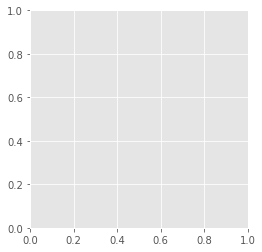

In [41]:
# display the word cloud
plt.imshow(NYC_CUISINE_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()


##### <matplotlib.figure.Figure at 0x7f562c289160>
Most Preferred Food in New York City -

1.Italian  
2.Purto Rican   
3.Mexican   
4.Jewish  
5.Indian  
6.Pakistani  
7.Dominican   

### BROOKLYN CUISINE - WORD CLOUD

In [42]:
Brooklyn_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Brooklyn'].reset_index(drop=True)
Brooklyn_data.head()

NameError: name 'NYC_CUISINE' is not defined

In [43]:
BR_CUISINE_WC = Brooklyn_data[['Cuisine']]
BR_CUISINE_WC

NameError: name 'Brooklyn_data' is not defined

In [44]:
BR_CUISINE_WC.to_csv('BR_CUISINE.txt', sep=',', index=False)

NameError: name 'BR_CUISINE_WC' is not defined

In [45]:
BR_CUISINE_WC = open('BR_CUISINE.txt', 'r').read()

FileNotFoundError: [Errno 2] No such file or directory: 'BR_CUISINE.txt'

In [46]:
stopwords = set(STOPWORDS)

In [47]:
# instantiate a word cloud object
BR_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
BR_CUISINE_NYC.generate(BR_CUISINE_WC)

NameError: name 'BR_CUISINE_WC' is not defined

ValueError: WordCloud has not been calculated, call generate first.

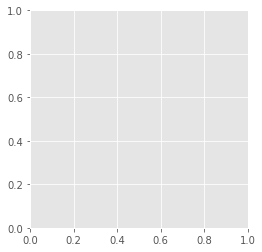

In [48]:
# display the word cloud
plt.imshow(BR_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

<matplotlib.figure.Figure at 0x7f562c149b00>  
Most Preferred Food in Brooklyn is -

1.Italian   
2.Purto Rican   
3.Mexican  

### QUEENS CUISINE - WORD CLOUD

In [49]:
Queens_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Queens'].reset_index(drop=True)
Queens_data.head()

NameError: name 'NYC_CUISINE' is not defined

In [50]:
Q_CUISINE_WC = Queens_data[['Cuisine']]
Q_CUISINE_WC

NameError: name 'Queens_data' is not defined

In [51]:
Q_CUISINE_WC.to_csv('Q_CUISINE.txt', sep=',', index=False)

NameError: name 'Q_CUISINE_WC' is not defined

In [52]:

Q_CUISINE_WC = open('Q_CUISINE.txt', 'r').read()

FileNotFoundError: [Errno 2] No such file or directory: 'Q_CUISINE.txt'

In [53]:
stopwords = set(STOPWORDS)

In [54]:
# instantiate a word cloud object
Q_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
Q_CUISINE_NYC.generate(Q_CUISINE_WC)

NameError: name 'Q_CUISINE_WC' is not defined

ValueError: WordCloud has not been calculated, call generate first.

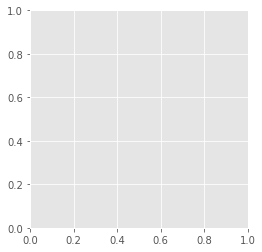

In [55]:
# display the word cloud
plt.imshow(Q_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

<matplotlib.figure.Figure at 0x7f562c122160>     
Most Preferred Food in Queens is -

1.Indian  
2.Irish  
3.Pakistani  
4.Mexican

### MANHATTAN CUISINE - WORD CLOUD

In [56]:
Manhattan_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Manhattan'].reset_index(drop=True)
Manhattan_data.head()

NameError: name 'NYC_CUISINE' is not defined

In [57]:
MN_CUISINE_WC = Manhattan_data[['Cuisine']]
MN_CUISINE_WC

NameError: name 'Manhattan_data' is not defined

In [58]:
MN_CUISINE_WC.to_csv('MN_CUISINE.txt', sep=',', index=False)

NameError: name 'MN_CUISINE_WC' is not defined

In [59]:
MN_CUISINE_WC = open('MN_CUISINE.txt', 'r').read()

FileNotFoundError: [Errno 2] No such file or directory: 'MN_CUISINE.txt'

In [60]:
stopwords = set(STOPWORDS)

In [61]:
# instantiate a word cloud object
MN_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
MN_CUISINE_NYC.generate(MN_CUISINE_WC)

NameError: name 'MN_CUISINE_WC' is not defined

ValueError: WordCloud has not been calculated, call generate first.

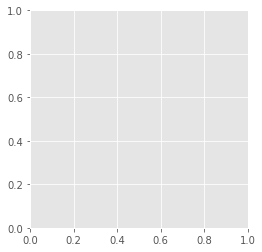

In [62]:
# display the word cloud
plt.imshow(MN_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()


<matplotlib.figure.Figure at 0x7f562c178d68>  
Most Preferred Food in Manhattan is -  

1.Italian  
2.American  
3.Puerto Rican  
4.Indian

#### THE BRONX CUISINE - WORD CLOUD

In [63]:
Bronx_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'The Bronx'].reset_index(drop=True)
Bronx_data.head()

NameError: name 'NYC_CUISINE' is not defined

In [64]:
BX_CUISINE_WC = Bronx_data[['Cuisine']]
BX_CUISINE_WC

NameError: name 'Bronx_data' is not defined

In [65]:
BX_CUISINE_WC.to_csv('BX_CUISINE.txt', sep=',', index=False)

NameError: name 'BX_CUISINE_WC' is not defined

In [66]:
BX_CUISINE_WC = open('BX_CUISINE.txt', 'r').read()

FileNotFoundError: [Errno 2] No such file or directory: 'BX_CUISINE.txt'

In [67]:
stopwords = set(STOPWORDS)

In [68]:
# instantiate a word cloud object
BX_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
BX_CUISINE_NYC.generate(BX_CUISINE_WC)

NameError: name 'BX_CUISINE_WC' is not defined

ValueError: WordCloud has not been calculated, call generate first.

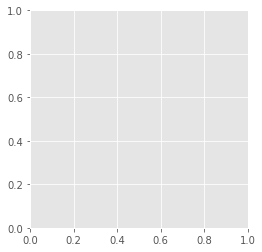

In [69]:
# display the word cloud
plt.imshow(BX_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

<matplotlib.figure.Figure at 0x7f562c126978>   
Most Preferred Food in The Bronx is -   

1.Italian  
2.Puerto Rican  
3.Albanian  
4.Dominican  

### Part 4 Download and Explore Farmers Market dataset

#### Download all the dependencies needed

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y
import seaborn as sns

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Libraries imported.


#### The dataset is downloaded from the website. The link is as given below :

https://data.cityofnewyork.us/dataset/DOHMH-Farmers-Markets-and-Food-Boxes/8vwk-6iz2

In [2]:
# Data from website - https://data.cityofnewyork.us/dataset/DOHMH-Farmers-Markets-and-Food-Boxes/8vwk-6iz2
my_file = project.get_file("DOHMH_Farmers_Markets_and_Food_Boxes.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
FM_NYC=pd.read_csv(my_file)


NameError: name 'project' is not defined

In [3]:
FM_NYC.head()

NameError: name 'FM_NYC' is not defined

Website-https://www.grownyc.org/greenmarketco/foodbox   
GrowNYC's Fresh Food Box Program is a food access initiative that enables under-served communities to purchase fresh, healthy, and primarily regionally grown produce well below traditional retail prices.  

A farmers' market is often defined as a public site used by two or more local or regional producers for the direct sale of farm products to consumers. In addition to fresh fruits and vegetables, markets may sell dairy products, fish, meat, baked goods, and other minimally processed foods.
  
So, in this we will filter farmers' market data and explore it.

In [4]:
FM_NYC.rename(columns={'Service Type':'Service_Type'}, inplace=True)
print(FM_NYC.Service_Type.unique())

NameError: name 'FM_NYC' is not defined

In [5]:
FM_NYC['Service_Type'].value_counts().to_frame()

NameError: name 'FM_NYC' is not defined

NameError: name 'FM_NYC' is not defined

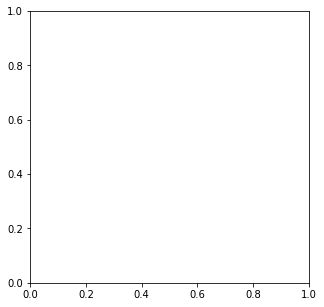

In [6]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Service_Type',data=FM_NYC)
ax.set_title("Service_Type")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
    
plt.show();

In [7]:
# FM_NYC_filtered - Dataset with only Farmers Market
FM_NYC_filtered = FM_NYC[FM_NYC['Service_Type'] == 'Farmers Markets'].copy()
FM_NYC_filtered ['Borough'] = FM_NYC_filtered['Borough'].map(lambda x: x.strip())
print(FM_NYC_filtered.shape)
FM_NYC_filtered.head()

NameError: name 'FM_NYC' is not defined

NameError: name 'FM_NYC_filtered' is not defined

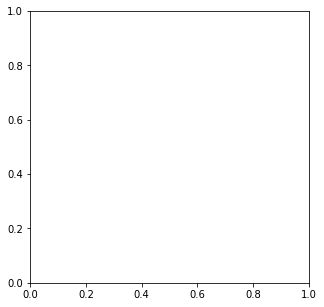

In [8]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Borough',data=FM_NYC_filtered)
ax.set_title("Borough")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

#### Use geopy library to get the latitude and longitude values of New York City.
The geograpical coordinate of New York City are 40.7308619, -73.9871558.

In [9]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with Facility name and Borough of Farmers Market superimposed on top.

In [10]:
# create map of New York City using latitude and longitude values
map_markets = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, FacilityName, borough in zip(FM_NYC_filtered['Latitude'], FM_NYC_filtered['Longitude'], FM_NYC_filtered['FacilityName'], FM_NYC_filtered['Borough']):
            label = '{}, {}'.format(FacilityName, borough)
            label = folium.Popup(label, parse_html=True)
            folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='green',
                fill=True,
                fill_color='green',
                fill_opacity=0.7,
                parse_html = False).add_to(map_markets)  

map_markets

NameError: name 'FM_NYC_filtered' is not defined

### Part 5A Segmenting and Clustering Neighborhoods - Brooklyn and Manhattan

#### Introduction
In this section of the capstone project, we will use the Foursquare API to explore neighborhoods in Brooklyn and Manhattan. We will use the explore function to get the most common venue categories in each neighborhood, and then use this feature to group the neighborhoods into clusters. We will use the k-means clustering algorithm to complete this task. Finally, we will use the Folium library to visualize the neighborhoods in Brooklyn and Manhattan and their emerging clusters.

### Table of Contents  

1. Download and Explore Dataset  
2. Explore Neighborhoods in Brooklyn and Manhattan  
3. Analyze Each Neighborhood  
4. Cluster Neighborhoods and Examine Clusters  

Download all the dependencies that are needed.  

In [12]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### 1. Download and Explore Dataset
Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the latitude and logitude coordinates of each neighborhood.

Load and explore the data

In [13]:
NYC_Geo=pd.read_csv('BON1_NYC_GEO.csv')
print('Data downloaded!')

Data downloaded!


In [14]:
NYC_Geo.head()

,Borough,Neighborhood,Latitude,Longitude


In [15]:
NYC_Geo['Borough'].value_counts().to_frame()

,Borough


In [16]:
NYC_Geo.shape

(0, 4)

In [17]:
print(NYC_Geo.Borough.unique())

[]


In [18]:
NYC_Geo.isnull().sum()

Borough         0
Neighborhood    0
Latitude        0
Longitude       0
dtype: int64

### Segmenting and Clustering Neighborhoods - Brooklyn and Manhattan

In [19]:
BM_Geo = NYC_Geo.loc[(NYC_Geo['Borough'] == 'Brooklyn')|(NYC_Geo['Borough'] == 'Manhattan')]
BM_Geo = BM_Geo.reset_index(drop=True)
BM_Geo.head()

,Borough,Neighborhood,Latitude,Longitude


In [20]:
BM_Geo.shape

(0, 4)

##### Use geopy library to get the latitude and longitude values of New York City. The geograpical coordinate of New York City are 40.7308619, -73.9871558..

In [21]:
import time
start_time = time.time()

address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

print("--- %s seconds ---" % round((time.time() - start_time), 2))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.
--- 0.91 seconds ---


### Create a map of Brooklyn and Manhattan with neighborhoods superimposed on top.

In [22]:
# create map of Toronto using latitude and longitude values
map_BM = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(BM_Geo['Latitude'], BM_Geo['Longitude'], BM_Geo['Borough'], BM_Geo['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_BM)  
    
map_BM

#### Define Foursquare Credentials and Version

In [23]:
CLIENT_ID = 'OLN1BAQQBHO234LKFIU1ZNGV4Z3O3P1GS5KIMTNPJHLX1MKL' # your Foursquare ID
CLIENT_SECRET = 'VDM5CGGVSUOGKMY21ETO4J1UAJH5QJEALQCJAIWUF2DJXR2T' # your Foursquare Secret
VERSION = '20181218' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OLN1BAQQBHO234LKFIU1ZNGV4Z3O3P1GS5KIMTNPJHLX1MKL
CLIENT_SECRET:VDM5CGGVSUOGKMY21ETO4J1UAJH5QJEALQCJAIWUF2DJXR2T


### 2. Explore Neighborhoods in Brooklyn and Manhattan  

Extract Venues data for each neighborhoods in Brooklyn

In [24]:
def getNearbyVenues(names, latitudes, longitudes, LIMIT=200, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Run the above function on each neighborhood and create a new dataframe called BM_venues.

In [25]:
BM_venues = getNearbyVenues(names=BM_Geo['Neighborhood'],
                                  latitudes=BM_Geo['Latitude'],
                                  longitudes=BM_Geo['Longitude'],
                                  LIMIT=200)

print('The "BM_venues" dataframe has {} venues and {} unique venue types.'.format(
      len(BM_venues['Venue Category']),
      len(BM_venues['Venue Category'].unique())))

BM_venues.to_csv('BM_venues.csv', sep=',', encoding='UTF8')
BM_venues.head()

ValueError: Length mismatch: Expected axis has 0 elements, new values have 7 elements

#### Download data from BM_venues.csv

In [26]:
colnames = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
BM_venues = pd.read_csv('BM_venues.csv', skiprows=1, names=colnames)
BM_venues.columns = BM_venues.columns.str.replace(' ', '')
BM_venues.head()

FileNotFoundError: [Errno 2] File b'BM_venues.csv' does not exist: b'BM_venues.csv'

In [27]:
BM_venues.shape

NameError: name 'BM_venues' is not defined

##### Visualize the BM_Venues data

In [28]:
def Venues_Map(Borough_name, Borough_neighborhoods):
    
    # Use geopy library to get the latitude and longitude values 
    geolocator = Nominatim(user_agent="Jupyter")
    Borough_location = geolocator.geocode(Borough_name) #'Brooklyn, NY'
    Borough_latitude = Borough_location.latitude
    Borough_longitude = Borough_location.longitude
    print('The geographical coordinates of "{}" are {}, {}.'.format(Borough_name, Borough_latitude, Borough_longitude))
    
    # To verify the number of Boroughs and Neighborhoods in the extracted data
    print('The "{}" dataframe has {} different venue types and {} neighborhoods.'.format(
          Borough_name,
          len(Borough_neighborhoods['VenueCategory'].unique()),
          len(Borough_neighborhoods['Neighborhood'].unique())))
    
    # create map of city using latitude and longitude values
    map_Borough = folium.Map(location=[Borough_latitude, Borough_longitude], zoom_start=10)

    # add markers to map
    for lat, lng, venue, category in zip(Borough_neighborhoods['VenueLatitude'], Borough_neighborhoods['VenueLongitude'], Borough_neighborhoods['Venue'], Borough_neighborhoods['VenueCategory']):
        label = '{}, {}'.format(category, venue)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=0.1,
            popup=label,
            color='red',
            fill=True,
            fill_color='#FF0000',
            fill_opacity=0.3).add_to(map_Borough)  

    return map_Borough

In [29]:
Venues_Map('New York City, NY', BM_venues)

NameError: name 'BM_venues' is not defined

In [30]:
BM_venues.groupby('VenueCategory')['Venue'].count().sort_values(ascending=False)

NameError: name 'BM_venues' is not defined

In [31]:
BM_venues.groupby('Neighborhood').count()

NameError: name 'BM_venues' is not defined

##### Find out how many unique categories can be curated from all the returned venues

In [32]:
print('There are {} uniques categories.'.format(len(BM_venues['VenueCategory'].unique())))

NameError: name 'BM_venues' is not defined

### 3. Analyze Each Neighborhood

In [33]:
# one hot encoding
BM_onehot = pd.get_dummies(BM_venues[['VenueCategory']], prefix="", prefix_sep="")

#column lists before adding neighborhood
column_names = ['Neighborhood'] + list(BM_onehot.columns)

# add neighborhood column back to dataframe
BM_onehot['Neighborhood'] = BM_venues['Neighborhood'] 

# move neighborhood column to the first column
BM_onehot = BM_onehot[column_names]

BM_onehot.head()

NameError: name 'BM_venues' is not defined

#### To filter only Restaurant data

In [34]:
restaurant_List = []
search = 'Restaurant'
for i in BM_onehot.columns :
    if search in i:
        restaurant_List.append(i)

NameError: name 'BM_onehot' is not defined

In [35]:
restaurant_List

[]

In [36]:
col_name = []
col_name = ['Neighborhood'] + restaurant_List
BM_restaurant = BM_onehot[col_name]
BM_restaurant = BM_restaurant.iloc[:,1::]

NameError: name 'BM_onehot' is not defined

In [37]:
BM_restaurant_grouped = BM_restaurant.groupby('Neighborhood').sum().reset_index()

NameError: name 'BM_restaurant' is not defined

In [38]:
BM_restaurant_grouped['Total'] = BM_restaurant_grouped .sum(axis=1)

NameError: name 'BM_restaurant_grouped' is not defined

## 4. Cluster Neighborhoods and Examine Clusters  
First, let's determine the optimal value of K for our dataset using the Silhouette Coefficient Method  

From sklearn documentation - https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient  

A higher Silhouette Coefficient score relates to a model with better-defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores: `
  
a: The mean distance between a sample and all other points in the same class.  

b: The mean distance between a sample and all other points in the next nearest cluster.  

The Silhouette Coefficient is for a single sample is then given as:  
  
s=b-a/max(a,b)  

Now, to find the optimal value of k for KMeans, loop through 1..n for n_clusters in KMeans and calculate Silhouette Coefficient for each sample.  

A higher Silhouette Coefficient indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.  

In [39]:
BM_grouped_clustering = BM_restaurant_grouped.drop('Neighborhood', 1)

for n_cluster in range(2, 10):
    kmeans = KMeans(n_clusters=n_cluster).fit(BM_grouped_clustering)
    label = kmeans.labels_
    sil_coeff = silhouette_score(BM_grouped_clustering, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

NameError: name 'BM_restaurant_grouped' is not defined

### As we can see, n_clusters=2 has highest Silhouette Coefficient.

This means that 2 should be the optimal number of clusters.



#### For n_clusters=2, The Silhouette   Coefficient is 0.4070573233323876

Run k-means to cluster the neighborhood into 2 clusters.

In [40]:
# set number of clusters
kclusters = 2

BM_grouped_clustering = BM_restaurant_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(BM_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

NameError: name 'BM_restaurant_grouped' is not defined

In [41]:
BM_results = pd.DataFrame(kmeans.cluster_centers_)
BM_results.columns = BM_grouped_clustering.columns
BM_results.index = ['cluster0','cluster1']
BM_results['Total Sum'] = BM_results.sum(axis = 1)
BM_results

NameError: name 'kmeans' is not defined

### Dataframe with Neighborhood,Cluster No and Total Sum

In [42]:
BM_results_merged = pd.DataFrame(BM_restaurant_grouped['Neighborhood'])

BM_results_merged['Total'] = BM_restaurant_grouped['Total']
BM_results_merged = BM_results_merged.assign(Cluster_Labels = kmeans.labels_)

NameError: name 'BM_restaurant_grouped' is not defined

In [43]:
print(BM_results_merged.shape)
BM_results_merged

NameError: name 'BM_results_merged' is not defined

#### Merge BM_results_merged with BM_Geo

In [44]:
BM_merged = BM_Geo

BM_merged = BM_merged.join(BM_results_merged.set_index('Neighborhood'), on='Neighborhood')

print(BM_merged.shape)
BM_merged.head(10) # check the last columns!

NameError: name 'BM_results_merged' is not defined

#### Finally, let's visualize the resulting clusters

In [45]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(BM_merged['Latitude'], BM_merged['Longitude'], BM_merged['Neighborhood'], BM_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

KeyError: 'Cluster_Labels'

### List Neighborhoods of Interest in New York City
Cluster 1 : Saturated Markets

In [46]:
BM_merged[BM_merged['Cluster_Labels'] == 1].reset_index(drop=True)

KeyError: 'Cluster_Labels'

### Cluster 0 : Untapped Markets

In [47]:
BM_merged[BM_merged['Total'] == 0].reset_index(drop=True)

KeyError: 'Total'

### Part 5B Segmenting and Clustering Neighborhoods - Bronx, Queens and Staten Island

## Introduction
In this section of the capstone project, we will use the Foursquare API to explore neighborhoods in Bronx, Queens and Staten Island.

## Table of Contents
1. Download and Explore Dataset
2. Explore Neighborhoods in Bronx, Queens and Staten Island
3. Analyze Each Neighborhood
4. Cluster Neighborhoods and Examine Clusters

### 1. Download and Explore Dataset

In [48]:
BQS_Geo = NYC_Geo.loc[(NYC_Geo['Borough'] == 'Bronx')|(NYC_Geo['Borough'] == 'Queens')|(NYC_Geo['Borough'] == 'Staten Island')]
BQS_Geo = BQS_Geo.reset_index(drop=True)
BQS_Geo.head()

,Borough,Neighborhood,Latitude,Longitude


In [49]:
BQS_Geo.shape

(0, 4)

### Create a map of Bronx, Queens and Staten Island with neighborhoods superimposed on top.

In [50]:
# create map of Toronto using latitude and longitude values
map_BQS = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(BQS_Geo['Latitude'], BQS_Geo['Longitude'], BQS_Geo['Borough'], BQS_Geo['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_BQS)  
    
map_BQS

### 2. Explore Neighborhoods in Bronx, Queens and Staten Island
Run the above function on each neighborhood and create a new dataframe called BQS_venues.

In [51]:
BQS_venues = getNearbyVenues(names=BQS_Geo['Neighborhood'],
                                  latitudes=BQS_Geo['Latitude'],
                                  longitudes=BQS_Geo['Longitude'],
                                  LIMIT=200)

print('The "BQS_venues" dataframe has {} venues and {} unique venue types.'.format(
      len(BQS_venues['Venue Category']),
      len(BQS_venues['Venue Category'].unique())))

BQS_venues.to_csv('BQS_venues.csv', sep=',', encoding='UTF8')
BQS_venues.head()

ValueError: Length mismatch: Expected axis has 0 elements, new values have 7 elements

### Download data from Brooklyn_venues.csv

In [52]:
colnames = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
BQS_venues = pd.read_csv('BQS_venues.csv', skiprows=1, names=colnames)
BQS_venues.columns = BQS_venues.columns.str.replace(' ', '')
BQS_venues.head()

FileNotFoundError: [Errno 2] File b'BQS_venues.csv' does not exist: b'BQS_venues.csv'

### Visualize the BQS_Venues data

In [53]:
BQS_venues.groupby('VenueCategory')['Venue'].count().sort_values(ascending=False)

NameError: name 'BQS_venues' is not defined

### Let's check how many venues were returned for each neighborhood

In [54]:
BQS_venues.groupby('Neighborhood').count()

NameError: name 'BQS_venues' is not defined

#### Let's find out how many unique categories can be curated from all the returned venues

In [55]:
print('There are {} uniques categories.'.format(len(BQS_venues['VenueCategory'].unique())))

NameError: name 'BQS_venues' is not defined

### 3. Analyze Each Neighborhood

In [56]:
# one hot encoding
BQS_onehot = pd.get_dummies(BQS_venues[['VenueCategory']], prefix="", prefix_sep="")

#column lists before adding neighborhood
column_names = ['Neighborhood'] + list(BQS_onehot.columns)

# add neighborhood column back to dataframe
BQS_onehot['Neighborhood'] = BQS_venues['Neighborhood'] 

# move neighborhood column to the first column
BQS_onehot = BQS_onehot[column_names]

BQS_onehot.head()

NameError: name 'BQS_venues' is not defined

In [57]:
restaurant_List1 = []
search = 'Restaurant'
for i in BQS_onehot.columns :
    if search in i:
        restaurant_List1.append(i)

NameError: name 'BQS_onehot' is not defined

In [58]:
restaurant_List1

[]

In [59]:
col_name = []
col_name = ['Neighborhood'] + restaurant_List1
BQS_restaurant = BQS_onehot[col_name]
BQS_restaurant = BQS_restaurant.iloc[:,1::]

NameError: name 'BQS_onehot' is not defined

In [60]:
BQS_restaurant_grouped = BQS_restaurant.groupby('Neighborhood').sum().reset_index()

NameError: name 'BQS_restaurant' is not defined

In [61]:
BQS_restaurant_grouped['Total'] = BQS_restaurant_grouped .sum(axis=1)

NameError: name 'BQS_restaurant_grouped' is not defined

### 4. Cluster Neighborhoods and Examine Clusters
First, let's determine the optimal value of K for our dataset using the Silhouette Coefficient Method

In [62]:
BQS_grouped_clustering = BQS_restaurant_grouped.drop('Neighborhood', 1)

for n_cluster in range(2, 10):
    kmeans = KMeans(n_clusters=n_cluster).fit(BQS_grouped_clustering)
    label = kmeans.labels_
    sil_coeff = silhouette_score(BQS_grouped_clustering, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

NameError: name 'BQS_restaurant_grouped' is not defined

##### As we can see, n_clusters=2 has highest Silhouette Coefficient. This means that 2 should be the optimal number of clusters.


#### For n_clusters=2, The Silhouette Coefficient is 0.5480109689584506,     Run k-means to cluster the neighborhood into 2 clusters.

In [63]:
# set number of clusters
kclusters = 2

BQS_grouped_clustering = BQS_restaurant_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(BQS_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

NameError: name 'BQS_restaurant_grouped' is not defined

In [64]:
BQS_results = pd.DataFrame(kmeans.cluster_centers_)
BQS_results.columns = BQS_grouped_clustering.columns
BQS_results.index = ['cluster0','cluster1']
BQS_results['Total Sum'] = BQS_results.sum(axis = 1)
BQS_results

NameError: name 'kmeans' is not defined

### Dataframe with Neighborhood,Cluster No and Total Sum

In [65]:
BQS_results_merged = pd.DataFrame(BQS_restaurant_grouped['Neighborhood'],)

BQS_results_merged['Total'] = BQS_restaurant_grouped['Total']
BQS_results_merged = BQS_results_merged.assign(Cluster_Labels = kmeans.labels_)

NameError: name 'BQS_restaurant_grouped' is not defined

In [66]:
print(BQS_results_merged.shape)
BQS_results_merged

NameError: name 'BQS_results_merged' is not defined

### Merge BQS_results_merged with BQS_Geo

In [67]:
BQS_merged = BQS_Geo

BQS_merged = BQS_merged.join(BQS_results_merged.set_index('Neighborhood'), on='Neighborhood')

print(BQS_merged.shape)
BQS_merged.head(10) # check the last columns!

NameError: name 'BQS_results_merged' is not defined

### Finally, let's visualize the resulting clusters

In [68]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(BQS_merged['Latitude'], BQS_merged['Longitude'], BQS_merged['Neighborhood'], BQS_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

KeyError: 'Cluster_Labels'

### List Neighborhoods of Interest in New York City - Bronx, Queens and Staten Island


#### Cluster 1 : Saturated Markets

In [69]:
BQS_merged[BQS_merged['Cluster_Labels'] == 1].reset_index(drop=True)

KeyError: 'Cluster_Labels'

### Cluster 0 : Untapped Markets

In [70]:
BQS_merged[BQS_merged['Total'] == 0].reset_index(drop=True)

KeyError: 'Total'